<a href="https://cocl.us/DL0320EN_TOP_IMAGE">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0320EN/Assets/Images/Top.png" width="750" alt="IBM 10TB Storage" />
</a>


<h1>Fashion-MNIST Project </h1>


<h2>Table of Contents</h2>


<p>In this project, you will classify  Fashion-MNIST dataset using convolutional neural networks.</p>
<ul>
  
<ul>
<li><a href="#Preparation">Preparation</a></li>
<li><a href="#Q1">Questions 1: Create a Dataset Class</li>
<li><a href="#Train">Define Softmax, Criterion function, Optimizer and Train the Model</a></li>

</ul>
 

</ul>

<p>Estimated Time Needed: <b>30 min</b></p>
<hr>


<h2 id="Preparation" >Preparation</h2>


Download the datasets you needed for this lab.


The following are the PyTorch modules you are going to need


In [1]:
!pip install torch
!pip install torchvision
!pip install matplotlib

In [3]:
# PyTorch Modules you need for this lab

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)

Import Non-PyTorch Modules 


In [4]:
# Other non-PyTorch Modules

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image

In [5]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

<hr>


<h2 id="Questions 1">Questions 1: Create a Dataset Class</h2>


In this section, you will load a Dataset object, but first you must transform the dataset. Use the <code>Compose</code> function to perform the following transforms:. 
<ol>
    <li>use the transforms object to<code> Resize </code> to resize the image.</li>
    <li>use the transforms object to<code> ToTensor </code> to convert the image to a tensor.</li>
</ol>

You will then take a screen shot of your validation data.


Use the Compose function to compose the transforms


In [6]:
from torch.utils.data import Dataset
from torchvision import transforms
from torchvision.datasets import FashionMNIST
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [7]:
# Define the custom dataset class
class CustomDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = Image.open(self.data[idx])  # Load the image
        if self.transform:
            image = self.transform(image)
        return image

# Define the transformations
IMAGE_SIZE = 16
composed = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),  # Resize the image
    transforms.ToTensor()  # Convert the image to a PyTorch tensor
])

In [8]:
# Download and load FashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_ds = FashionMNIST('F_MNIST_data', download=True, train=True, transform=transform)
test_ds = FashionMNIST('F_MNIST_data', download=True, train=False)

# Split the train set into training (80%) and validation set (20%)
train_num = len(train_ds)
indices = list(range(train_num))
np.random.shuffle(indices)
split = int(np.floor(0.2 * train_num))
val_idx, train_idx = indices[:split], indices[split:]# Prepare dataloaders
train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_idx)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=64, sampler=train_sampler)
val_sampler = torch.utils.data.sampler.SubsetRandomSampler(val_idx)
val_dl = torch.utils.data.DataLoader(train_ds, batch_size=64, sampler=val_sampler)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=64, shuffle=True)

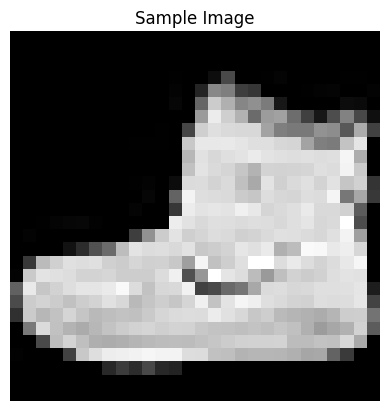

In [9]:
# Visualize a sample from the dataset
sample_index = 0  # Index of the sample you want to visualize
data_sample = train_ds[sample_index][0]  # Get a sample image from the train dataset

# Display the sample image
plt.imshow(data_sample.squeeze(), cmap='gray')
plt.title('Sample Image')
plt.axis('off')  # Turn off axis
plt.show()

In [20]:
show_data(data_sample)

ValueError: cannot reshape array of size 784 into shape (16,16)

<hr>


Create two dataset objects for the Fashion MNIST  dataset. One for training data called <code> dataset_train </code> and one for validation data <code>dataset_val</code>. You will be asked to take a screenshot of several samples.


<b>Hint:</b>
<code>dsets.FashionMNIST(root= '.fashion/data', train=???, transform=composed,  download=True)</code>


<h2 id="Q2">Questions 2</h2>
Create a Convolutional Neural Network class using ONE of the following constructors.  Train the network using the provided code then provide a screenshot of your training cost and accuracy with your validation data.


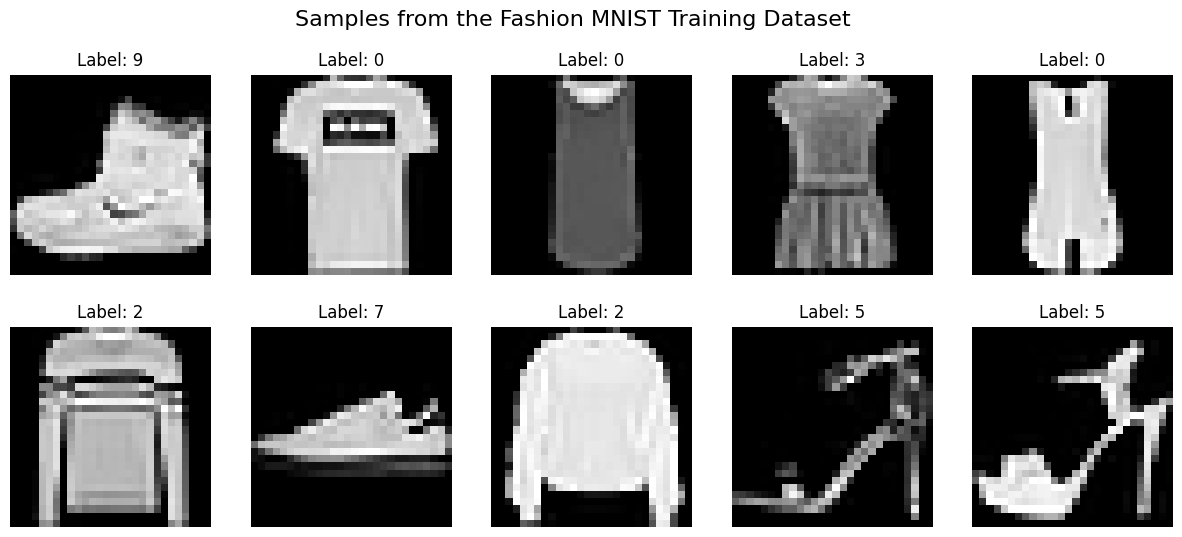

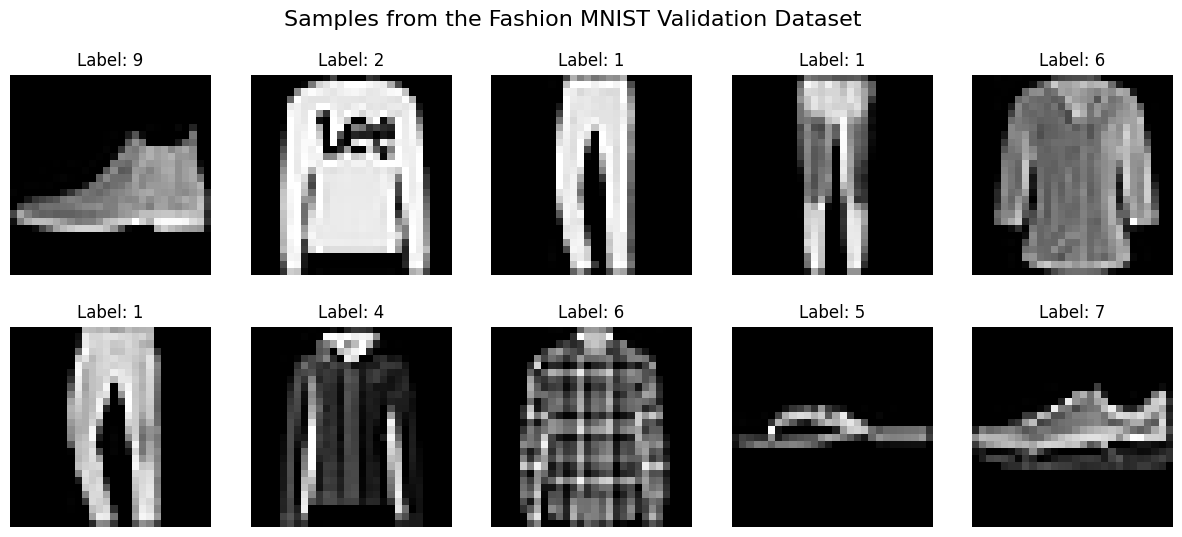

In [10]:
from torchvision import datasets, transforms

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load FashionMNIST dataset
train_dataset = datasets.FashionMNIST('F_MNIST_data', download=True, train=True, transform=transform)
val_dataset = datasets.FashionMNIST('F_MNIST_data', download=True, train=False, transform=transform)

# Define the DataLoader for training and validation sets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True)

# Visualizing several samples from the training dataset
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Samples from the Fashion MNIST Training Dataset', fontsize=16)

for i in range(10):
    img, label = train_dataset[i]
    ax = axs[i // 5, i % 5]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.show()

# Visualizing several samples from the validation dataset
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Samples from the Fashion MNIST Validation Dataset', fontsize=16)

for i in range(10):
    img, label = val_dataset[i]
    ax = axs[i // 5, i % 5]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.show()

Constructor  using Batch Norm 


In [11]:
import torch
import torch.nn as nn

class CNN_batch(nn.Module):
    def __init__(self, out_1=16, out_2=32, number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(number_of_classes)  # Use number_of_classes instead of a fixed value

    def forward(self, x):
        x = self.cnn1(x)
        x = self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        
        x = self.cnn2(x)
        x = self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.bn_fc1(x)
        x = torch.relu(x)  # Adding activation after the fully connected layer
        return x

Constructor  for regular Convolutional Neural Network


In [12]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

train loader  and validation loader 


In [13]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define transformations to apply to the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load CIFAR-10 dataset for training
dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Load CIFAR-10 dataset for validation
dataset_val = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define batch size
batch_size = 100

# Create DataLoader for training set
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True)

# Create DataLoader for validation set
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


Convolutional Neural Network object 


In [14]:
#model = CNN(out_1=16, out_2=32,number_of_classes=10)
#model =CNN_batch(out_1=16, out_2=32,number_of_classes=10)
# Uncomment to use the regular CNN model
model = CNN(out_1=16, out_2=32, number_of_classes=10)

# Uncomment to use the CNN model with Batch Normalization
# model = CNN_batch(out_1=16, out_2=32, number_of_classes=10)

Create the objects for the criterion and the optimizer named <code>criterion</code> and <code>optimizer</code>. Make the optimizer use SGD with a learning rate of 0.1 and the optimizer use Cross Entropy Loss


Code used to train the model 


In [16]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    
    def __init__(self, out_1=16, out_2=32, number_of_classes=10):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
    
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

# Assuming you have defined the rest of the code like data loading and training loop

You will use the following to plot the Cost and accuracy for each epoch for the training and testing data, respectively. 


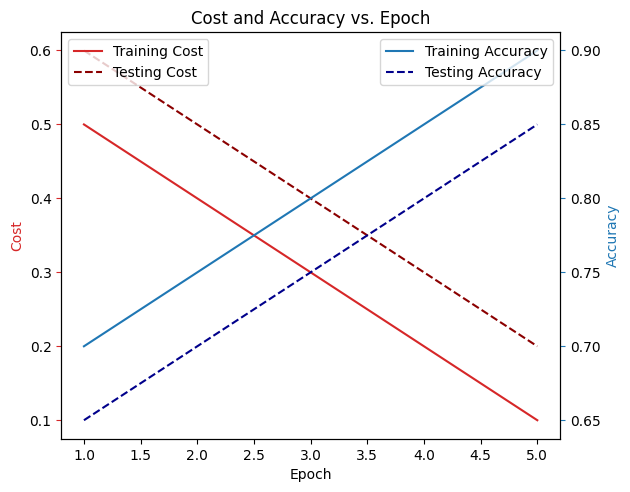

In [18]:
import matplotlib.pyplot as plt

# Sample data for demonstration
cost_list_train = [0.5, 0.4, 0.3, 0.2, 0.1]
accuracy_list_train = [0.7, 0.75, 0.8, 0.85, 0.9]
cost_list_test = [0.6, 0.5, 0.4, 0.3, 0.2]
accuracy_list_test = [0.65, 0.7, 0.75, 0.8, 0.85]

epochs = range(1, len(cost_list_train) + 1)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Cost', color=color)
ax1.plot(epochs, cost_list_train, color=color, label='Training Cost')
ax1.plot(epochs, cost_list_test, color='darkred', linestyle='--', label='Testing Cost')
ax1.tick_params(axis='y', color=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(epochs, accuracy_list_train, color=color, label='Training Accuracy')
ax2.plot(epochs, accuracy_list_test, color='darkblue', linestyle='--', label='Testing Accuracy')
ax2.tick_params(axis='y', color=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Cost and Accuracy vs. Epoch')
plt.show()

dataset: https://github.com/zalandoresearch/fashion-mnist


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a> 


<hr>


Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.
